# Inaugural Project

Imports and set magics

In [153]:
# importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as optimize
import pandas as pd
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import my code from pyfile
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

A tabel is created to illustrate how changes in $\alpha$ and $\sigma$ affects how females and males spend hours working at home

In [147]:
# (a) Defining the model based on the py-file
model = HouseholdSpecializationModelClass()


# (b) Defining alpha and sigma as lists
alpha_vec = [0.25, 0.5, 0.75]
sigma_vec = [0.5, 1, 1.5]


# (c) Creating a dataframe
df = pd.DataFrame(columns=alpha_vec, index=sigma_vec)


# (d) Loop over every sigma for every alpha
for alpha in alpha_vec:
    for sigma in sigma_vec:

        # (i) define parameteres in the model
        model.par.alpha = alpha
        model.par.sigma = sigma

        # (ii) defining the discrete method
        results1 = model.solve_discrete()

        # (iii) defining the ratio between worked hours in home for females relative to males
        ratio = results1.HF / results1.HM

        # (iv) adding the ratio to the dataframe
        df.loc[alpha, sigma] = ratio


# (e) printing the dataframe
print('')
print(df)


c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))



     0.25      0.50 0.75      1.00      1.50
0.50  NaN       1.0  NaN  1.000000  1.000000
1.00  NaN       NaN  NaN       NaN       NaN
1.50  NaN       NaN  NaN       NaN       NaN
0.25  NaN  0.545455  NaN  0.307692  0.214286
0.75  NaN  1.833333  NaN  3.250000  4.666667


$\alpha$ is the productivity of females working in the home relative to males. $\sigma$ is the elasticity of substitution between females and males hours spend in home labour. 

When $\alpha$ increases while $\sigma$ is contant, the ratio, $HF/HM$, increases since females become more productive. According to the aggregated utility of the household, it is optimal for females to allocate more of their to home labour. 




# Question 2

In the following, the ratio of hours worked in the home relative to the ratio of wage is plotted. As above when refering to the ratio, it is females relative to males. Notice, the wage of females changes in the plot

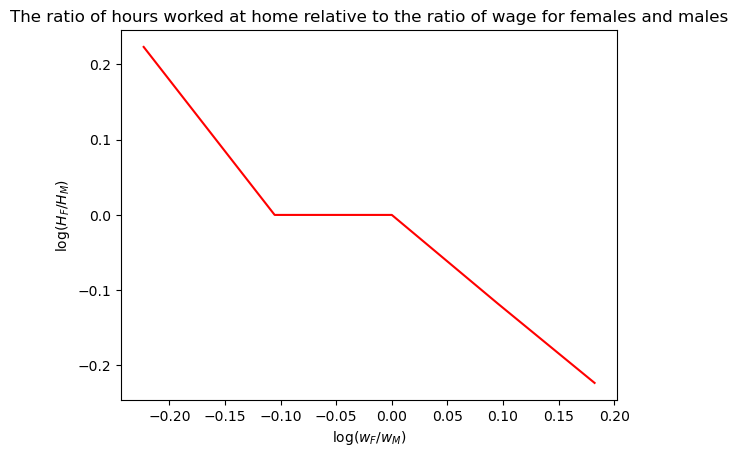

In [148]:
# (a) Initializing alpha and sigma
model.par.alpha = 0.5
model.par.sigma = 1


# (b) Creating empty lists
ratio_h = []
ratio_w = []


# (c) creating a loop over every wage of females 
for wF in [0.8, 0.9, 1, 1.1, 1.2]:

        # (i) defining parameteres in the model
        model.par.wF = wF
        
        # (ii) defining the discrete method
        results = model.solve_discrete()

        # (iii) defining the log ratio of hours worked at home
        ratio_h.append(np.log(results.HF / results.HM))

        # (iv) defining the log ratio of wage
        ratio_w.append(np.log(wF/model.par.wM))


plt.plot(ratio_w, ratio_h, color='red')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('The ratio of hours worked at home relative to the ratio of wage for females and males')
plt.show()


The figure illustrates the ratio of hours worked at home for females and males relative to the ratio of wage for females and males. If the wage of females increases relative to the male's, female's work at home relative to men decreases, because the alternative costs of women working at home increases. Explained intuitively, when female's salery increases, females work more at jobs, which forces men to work more in the home.

# Question 3

Explain your code and procedure

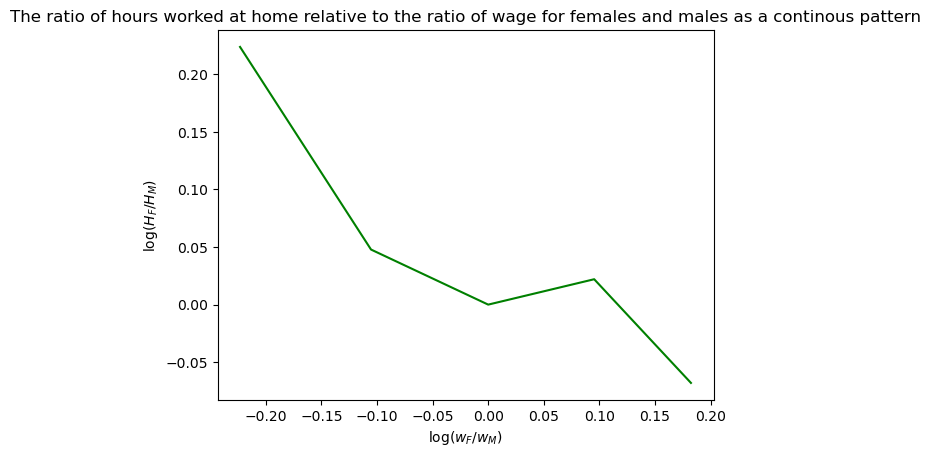

In [155]:
# (a) Creating empty lists
ratio_h_cont = []
ratio_w_cont = []


# (b) creating a loop over the wage of females
for wF in [0.8, 0.9, 1, 1.1, 1.2]:
    
        # (i) defining parameteres in the model
        model.par.wF = wF
        
        # (ii) defining the contiuous method
        opt = model.solve()

        # (iii) defining the log ratio of hours worked at home
        ratio_h_cont.append(np.log(opt.HF/opt.HM))

        # (iv) defining the log ratio of wage
        ratio_w_cont.append(np.log(wF/model.par.wM))


plt.plot(ratio_w, ratio_h, color='green')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('The ratio of hours worked at home relative to the ratio of wage for females and males as a continous pattern')
plt.show()




Conclusion: text missing

# Question 4

# Question 5